![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/01_Machine%20Learning%20%26%20Linear%20Regression/01_ml-linear-regression_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Load the Data

- The following list shows the names of tables we can work with:

In [2]:
import seaborn as sns #!
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

- We might see the all the tables and its data in [this GitHub repo](https://github.com/mwaskom/seaborn-data).
- Substitue the `name` by the dataset you want:

***For this project, we will predict the tip paid by a restaurant customer depending on the total payment they have made***

In [3]:
sns.load_dataset(name='tips').head() #!

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## `LinearRegression()` Model in Python

### Fit the Model

In [4]:
from sklearn.linear_model import LinearRegression

*Instantiate the class of the model*

In [5]:
model_lr = LinearRegression()

*Store the data*

In [6]:
import pandas as pd

df_tips = sns.load_dataset(name='tips')

In [7]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


*Separate data for variable X and Y*

In [8]:
features = df_tips[["total_bill"]] #will be our independent variable (x), the total bill that the customer has paid
target = df_tips["tip"] #will be our dependent variable (y), the waiter tip

*Training the model*

In [9]:
model_lr.fit(X=features, y=target)

LinearRegression()

### Calculate Predictions

*We pass the values (x) and the computer will apply the mathematical equation it created when we used the `fit()` method, for each independent* *value of the parameter*

In [11]:
pred_lr = model_lr.predict(X=features)

### Create a New DataFrame for the Predictions

In [13]:
df_tips["pred_lr"] = pred_lr

### Visualize the Model

1. The `x-axis` is represented by the **explanatory variable** you used to fit the model.
2. The `y-axis` is represented by the **predictions** you computed before.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

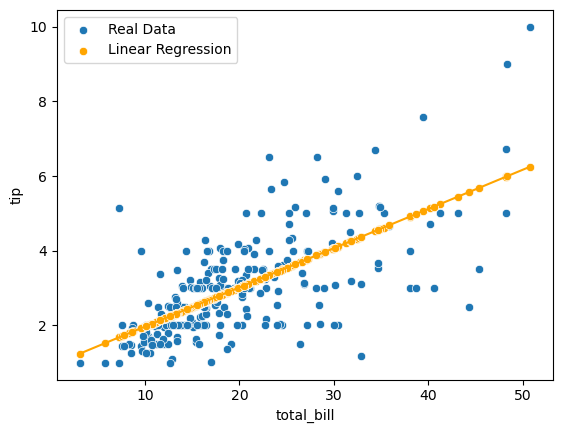

In [24]:
sns.scatterplot(x=df_tips["total_bill"], y=df_tips["tip"], label="Real Data")
sns.scatterplot(x=df_tips["total_bill"], y=pred_lr, label="Linear Regression", color="orange")
sns.lineplot(x=df_tips["total_bill"], y=pred_lr, color="orange")

### Model Interpretation

1. Especify the **mathematical equation** of the model.
2. **Interpret the coefficients** from the equation.

$$y = m \cdot x + b\$$

$$y = (coef_)  \cdot  (distance) + (intercept_)\$$

$$y = (0.105) \cdot (distance) + (0.92)\$$

In [28]:
model_lr.coef_

array([0.10502452])

In [29]:
model_lr.intercept_

0.9202696135546731

In [30]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['total_bill'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.10502452]),
 'rank_': 1,
 'singular_': array([138.77486834]),
 'intercept_': 0.9202696135546731}

### Model's Score

In [33]:
model_lr.score(X=features, y=target)

0.45661658635167657

*Same procedure for the others models:*

## `KNeighborsRegressor()` in Python

### Fit the Model

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
model_knr = KNeighborsRegressor()

In [49]:
model_knr.fit(X=features, y=target)

KNeighborsRegressor()

### Calculate Predictions

In [50]:
pred_knr = model_knr.predict(X=features)

df_tips["pred_knr"] = pred_knr

### Model's Score

In [51]:
model_nr.score(X=features, y=target)

0.5608871342064108

## `GradientBoostingRegressor()` in Python

### Fit the Model

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
model_gbr = GradientBoostingRegressor()

In [53]:
model_gbr.fit(X=features, y=target)

GradientBoostingRegressor()

### Calculate Predictions

In [56]:
pred_gbr = model_gbr.predict(X=features)

df_tips["pred_gbr"] = pred_gbr

### Model's Score

In [58]:
model_gbr.score(X=features, y=target)

0.7973753341134747

## Visualize the 3 Models

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

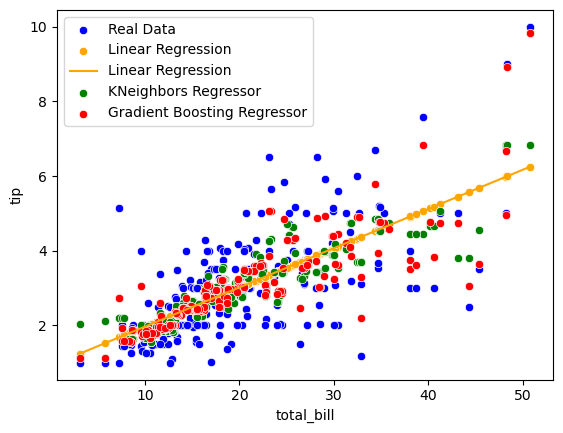

In [61]:
sns.scatterplot(x=df_tips["total_bill"], y=df_tips["tip"], color="blue", label="Real Data")
sns.scatterplot(x=df_tips["total_bill"], y=df_tips["pred_lr"], color="orange", label="Linear Regression")
sns.lineplot(x=df_tips["total_bill"], y=df_tips["pred_lr"], color="orange", label="Linear Regression")
sns.scatterplot(x=df_tips["total_bill"], y=df_tips["pred_knr"], color="green", label="KNeighbors Regressor")
sns.scatterplot(x=df_tips["total_bill"], y=df_tips["pred_gbr"], color="red", label="Gradient Boosting Regressor")

## Which One Is the Best Model? Why?

In [63]:
model_lr.score(X=features, y=target)

0.45661658635167657

In [64]:
model_knr.score(X=features, y=target)

0.5608871342064108

In [65]:
model_gbr.score(X=features, y=target)

0.7973753341134747

***The best model is the `GradientBoostingRegressor()`, with a 79% of score***

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Understand **how the Machine Learns/Optimizes the model**
    - [X] No more than to find the best numbers in a mathematical equation.
- [X] The `function()` as the indivisible part of programming.
    - As the **atom**: the key element in the Universe.
- [X] Understand **what's going on inside the computer** as you execute a function.
    - Is the code downloaded online, or could we use it withoug internet conection.
- [X] Use **programming as a tool**.
    - It's a **means to an end. NOT an end itself** (as hard as it may be to get started with).
- [X] Understand that statistics is not a perfect science. 
    - It tries to **approximate to the reality** the best way it can.
- [X] **Measuring the error** is nothing more than measuring the difference between reality and predictions.
- [X] We may use more than one mathematical formula to calculate the same variable.
    - Different models/equations/algorightms to calculate the same variable.
    - Some models might be better than other ones.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.